# EDA on the `MLA_100k_checked_v3` dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from utils import *

## Load the dataset

In [2]:
X_dataframe = pd.read_csv("../data/X_dataframe.csv")
X_dataframe.head()

,seller_address,warranty,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,price,attributes,...,secure_thumbnail,stop_time,status,video_id,catalog_product_id,initial_quantity,start_time,sold_quantity,available_quantity,used
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,80.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,NaN,NaN,1,1441485773000,0,1,False
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,2650.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,NaN,NaN,1,1443290910000,0,1,True
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,60.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,NaN,NaN,1,1441843027000,0,1,True
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,580.0,[],...,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,NaN,NaN,1,1443466076000,0,1,False
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,30.0,[],...,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445638040000,active,NaN,NaN,1,1440454040000,0,1,True


### Descriptions

In [3]:
X_dataframe["descriptions"].nunique()

87584

In [4]:
X_dataframe["descriptions"].value_counts()

descriptions
[]                                       2417
["{'id': 'MLA4695330653-912855983'}"]       1
["{'id': 'MLA6004136149-927877225'}"]       1
["{'id': 'MLA3184179382-900555397'}"]       1
["{'id': 'MLA5890602855-936034485'}"]       1
                                         ... 
["{'id': 'MLA6410600844-935154349'}"]       1
["{'id': 'MLA8932773648-931701858'}"]       1
["{'id': 'MLA7808141514-938090620'}"]       1
["{'id': 'MLA9974644605-925303054'}"]       1
["{'id': 'MLA8241142190-943040617'}"]       1
Name: count, Length: 87584, dtype: int64

In [5]:
X_dataframe["descriptions"].isnull().sum()/90000

np.float64(0.0)

In [7]:
import ast

X_dataframe["descriptions"] = X_dataframe["descriptions"].apply(ast.literal_eval)
X_dataframe["has_description"] = X_dataframe["descriptions"].apply(lambda x: len(x) > 0)
X_dataframe["has_description"].value_counts()


has_description
True     87583
False     2417
Name: count, dtype: int64

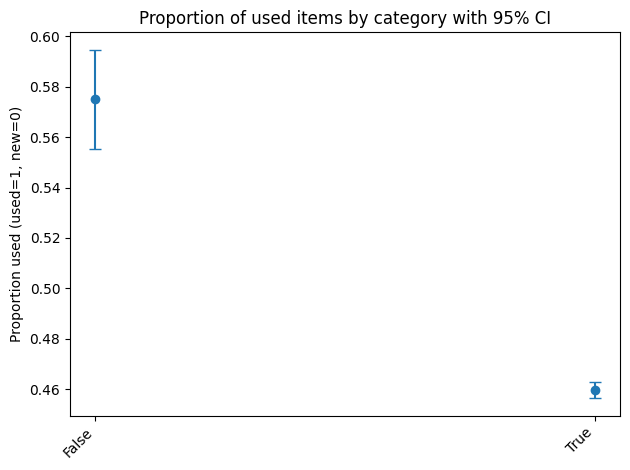

In [8]:
res = column_analysis("has_description", X_dataframe)
plot_column_analysis(res)


The p isn't strong: not an extreme value and also not supported with a lot of data